Test de CNN sur IPython


import des librairies nécessaires

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

Création du modèle

In [9]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Optional Step - Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Step 5 - Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [4]:
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

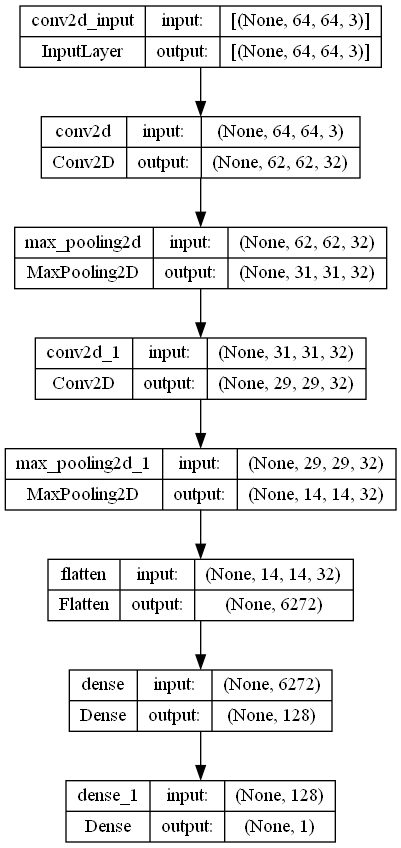

In [5]:
from keras.utils import plot_model
plot_model(classifier, to_file='test.png', show_shapes=True)

Training du modèle

In [6]:
# Part 2 - Training the CNN

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(r'dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit(training_set,
                         steps_per_epoch = 240,
                         epochs = 100,
                         validation_data = test_set,
                         validation_steps = 2000)

classifier.save("test_ipynb.h5")

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/100
240/240 [==============================] - 40s 164ms/step - loss: 0.6596 - accuracy: 0.5938 - val_loss: 0.6107 - val_accuracy: 0.6870
Epoch 2/100
240/240 [==============================] - 36s 151ms/step - loss: 0.5916 - accuracy: 0.6839
Epoch 3/100
240/240 [==============================] - 35s 145ms/step - loss: 0.5488 - accuracy: 0.7151
Epoch 4/100
240/240 [==============================] - 35s 145ms/step - loss: 0.5263 - accuracy: 0.7392
Epoch 5/100
240/240 [==============================] - 36s 148ms/step - loss: 0.4935 - accuracy: 0.7546
Epoch 6/100
240/240 [==============================] - 35s 146ms/step - loss: 0.4705 - accuracy: 0.7770
Epoch 7/100
240/240 [==============================] - 36s 150ms/step - loss: 0.4538 - accuracy: 0.7832
Epoch 8/100
240/240 [==============================] - 36s 149ms/step - loss: 0.4426 - accuracy: 0.7924
Epoch 9/100
240/240 [=====================

Lecture du modèle à partir d'un fichier

Il faut avoir créé le modèle avant de charger les poids


In [10]:
classifier.load_weights("test.h5")

Prédiction à partir du modèle

In [12]:
import numpy as np
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array 

test_image = load_img(r'dataset/single_prediction/cat_or_dog_3.jpg', target_size = (64, 64))


test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print(prediction)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\Python37\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-c29a7a37bd93>", line 2, in <module>
    from keras.utils import load_img
  File "c:\Python37\lib\site-packages\keras\__init__.py", line 21, in <module>
    from keras import models
  File "c:\Python37\lib\site-packages\keras\models\__init__.py", line 18, in <module>
    from keras.engine.functional import Functional
  File "c:\Python37\lib\site-packages\keras\engine\functional.py", line 26, in <module>
    from keras import backend
  File "c:\Python37\lib\site-packages\keras\backend.py", line 32, in <module>
    from keras import backend_config
  File "c:\Python37\lib\site-packages\keras\backend_config.py", line 33, in <module>
    @tf.__internal__.dispatch.add_dispatch_support
  File "c:\Python37\lib\site-packages\tensorflow_core\python\util\module_wrapper.py", line 193, in __g

AttributeError: module 'tensorflow._api.v1.compat.v2' has no attribute '__internal__'